In [168]:
# File system manangement
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

from num2words import num2words
!pip install pyspellchecker==0.5.6
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer

import spacy
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

In [169]:
# only include primary category

df = pd.read_csv('data_1cat.csv')
df.rename(columns = {'Category 1':'Category'}, inplace = True)
df

,Comment,Category
0,This is an unfortunate film. One of its bigges...,Directional Techniques
1,"Sometimes something sounds good, but the bare ...",Directional Techniques
2,A complete cult film in Spain.<br /><br />I th...,Directional Techniques
3,Some thoughts (for whatever they are worth)- <...,Directional Techniques
4,I saw that film when i studied films in englan...,Directional Techniques
...,...,...
1395,i have seen this film a few times but have nev...,Plot
1396,One of the earliest Japanese animation films I...,Visual Effect
1397,I found this movie an insult to the southern c...,Performance
1398,"Katrina (Emily Barcley) is a sad, pathetic, ut...",Plot


In [170]:
# include all labeled categories
df2 = pd.read_csv('data_3cat.csv')
df2

,Comment,Category 1,Category 2,Category 3
0,This is an unfortunate film. One of its bigges...,Directional Techniques,Visual Effect,NaN
1,"Sometimes something sounds good, but the bare ...",Directional Techniques,NaN,NaN
2,A complete cult film in Spain.<br /><br />I th...,Directional Techniques,NaN,NaN
3,Some thoughts (for whatever they are worth)- <...,Directional Techniques,NaN,NaN
4,I saw that film when i studied films in englan...,Directional Techniques,NaN,NaN
...,...,...,...,...
1395,i have seen this film a few times but have nev...,Plot,Performance,NaN
1396,One of the earliest Japanese animation films I...,Visual Effect,NaN,NaN
1397,I found this movie an insult to the southern c...,Performance,Visual Effect,NaN
1398,"Katrina (Emily Barcley) is a sad, pathetic, ut...",Plot,Performance,NaN


##Exploratory Data Analysis

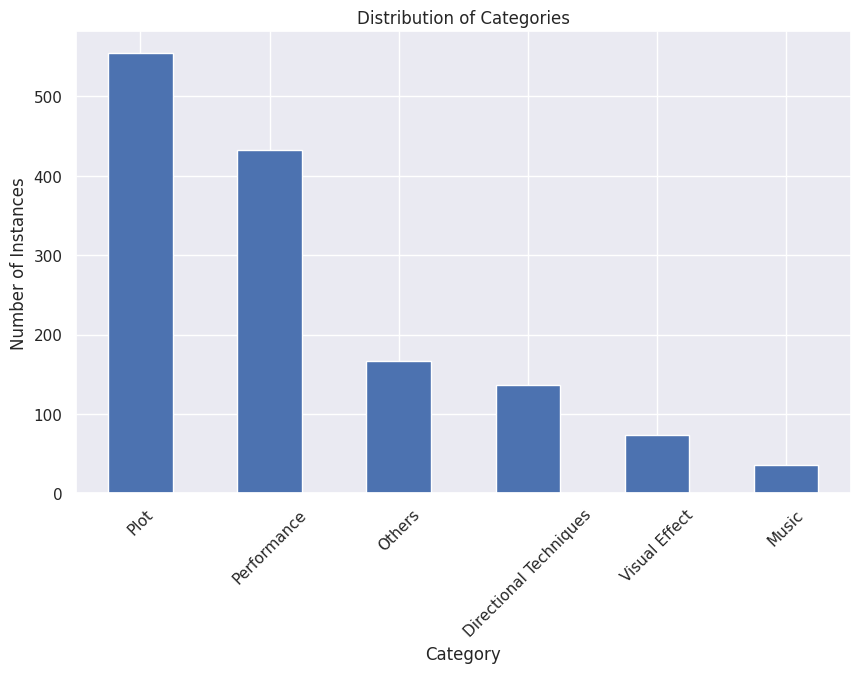

In [171]:
# Checking for missing values and the distribution of the classes

missing_values = df.isnull().sum()
class_distribution = df['Category'].value_counts()

missing_values, class_distribution

# Plotting the histogram for the distribution of categories
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [172]:
# Download stopwords from nltk
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text_with_html_removal(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Lowercase
    text = text.lower()
    # Remove punctuations
    text = re.sub(r'[\.\,\!\?\:\;\-\=]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove Stop Words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply preprocessing (including HTML removal) to the 'Comment' column
df['Processed_Comment_HTML_Removed'] = df['Comment'].apply(preprocess_text_with_html_removal)

# Display the first few rows of the updated preprocessed data
df[['Comment', 'Processed_Comment_HTML_Removed']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Processed_Comment_HTML_Removed
0,This is an unfortunate film. One of its bigges...,unfortunate film one biggest problems lack dir...
1,"Sometimes something sounds good, but the bare ...",sometimes something sounds good bare truth lea...
2,A complete cult film in Spain.<br /><br />I th...,complete cult film spain think alex one origin...
3,Some thoughts (for whatever they are worth)- <...,thoughts (for whatever worth) beach several tr...
4,I saw that film when i studied films in englan...,saw film studied films england liked director'...


In [173]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


In [174]:
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


In [175]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


In [176]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


In [177]:
# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [178]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [179]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [180]:
# Function to convert contractions in a text
regexp = RegexpTokenizer("[\w']+")
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


In [181]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [182]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


In [183]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


In [184]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming application"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming application
Output: introduc lemmat as an improv over stem applic


In [185]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


In [186]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


In [187]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe","br"]
# avoid general movie terms
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + movie_terms+ others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

In [188]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = convert_acronyms(text)
    text = remove_stopwords(text)
    #text = pyspellchecker(text)
    text = text_lemmatizer(text)
    text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll film, combine all functions into 1 SINGLE single, application applying FUNCTION 🙂 & apply on @product #descriptions"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll film, combine all functions into 1 SINGLE single, application applying FUNCTION 🙂 & apply on @product #descriptions
Output: we will combin function singl singl applic appli function appli product descript


In [189]:
#%%time

# Implementing text normalization
data_norm = pd.DataFrame()


data_norm['normalized comment'] = df['Comment'].apply(text_normalizer)


data_norm['label'] = df['Category']

data_norm

,normalized comment,label
0,unfortun one big problem lack direct mani schr...,Directional Techniques
1,sometim someth sound good bare truth leak crap...,Directional Techniques
2,complet cult spainbr think alex one origin tal...,Directional Techniques
3,thought whatev worth beach sever trainspotting...,Directional Techniques
4,see studi england director techniqu subjectsfi...,Directional Techniques
...,...,...
1395,see time never realli draw storylin find stori...,Plot
1396,one earli japanes anim rememb see perfect intr...,Visual Effect
1397,find insult southern cultur altman arrog jab a...,Performance
1398,katrina emili barcley sad pathet utterli narci...,Plot


In [190]:
data_norm2 = df2.copy()
data_norm2['Comment'] = df2['Comment'].apply(text_normalizer)
data_norm2

,Comment,Category 1,Category 2,Category 3
0,unfortun one big problem lack direct mani schr...,Directional Techniques,Visual Effect,NaN
1,sometim someth sound good bare truth leak crap...,Directional Techniques,NaN,NaN
2,complet cult spainbr think alex one origin tal...,Directional Techniques,NaN,NaN
3,thought whatev worth beach sever trainspotting...,Directional Techniques,NaN,NaN
4,see studi england director techniqu subjectsfi...,Directional Techniques,NaN,NaN
...,...,...,...,...
1395,see time never realli draw storylin find stori...,Plot,Performance,NaN
1396,one earli japanes anim rememb see perfect intr...,Visual Effect,NaN,NaN
1397,find insult southern cultur altman arrog jab a...,Performance,Visual Effect,NaN
1398,katrina emili barcley sad pathet utterli narci...,Plot,Performance,NaN


# Use word cloud to visulize text


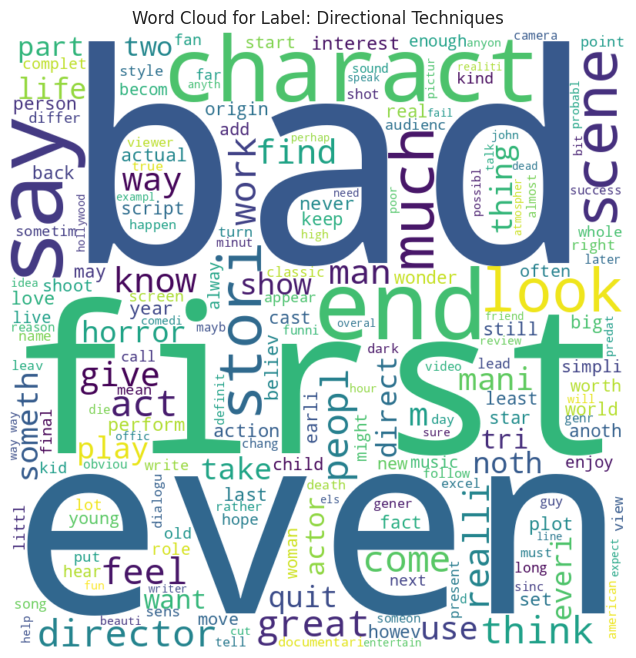

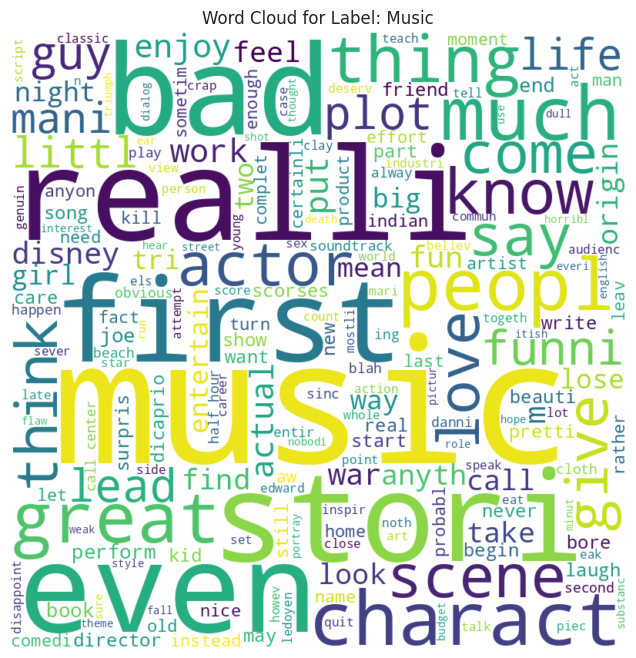

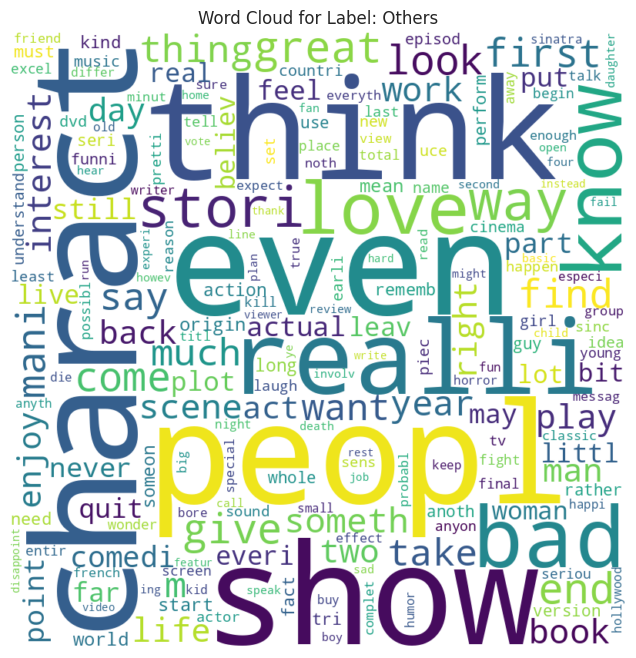

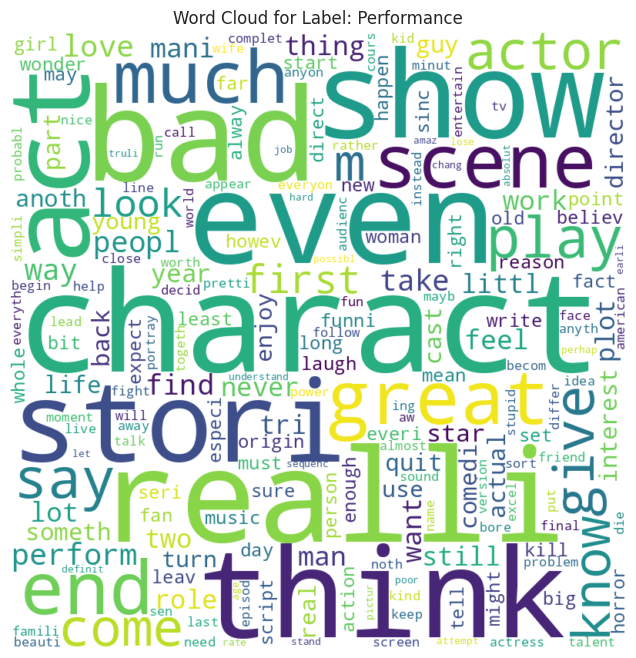

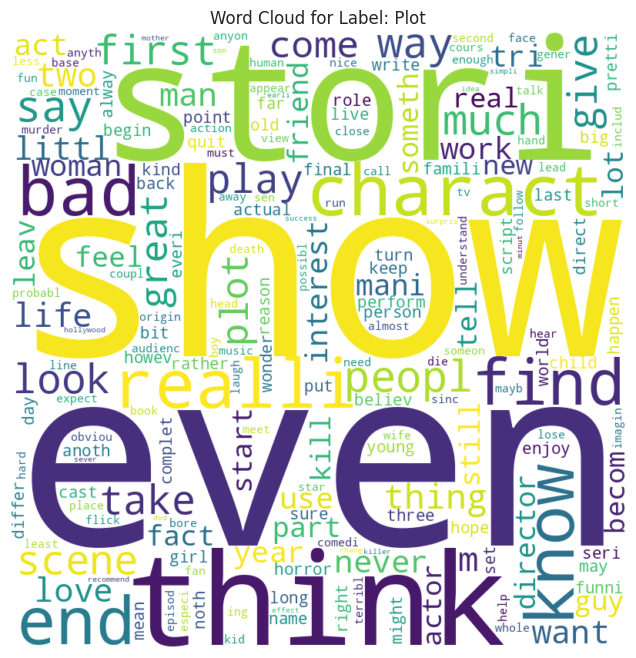

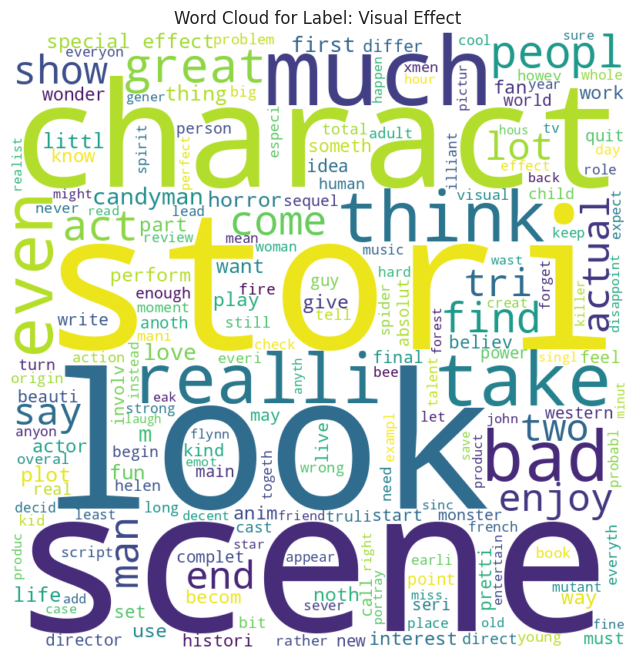

In [191]:
# use word cloud to visulze every categories
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_wc = data_norm.copy()

words_to_remove = ['movi', 'film','br','one','make','see','well','watch','good','go','time']

# 针对DataFrame中的特定列进行处理
for word in words_to_remove:
    data_wc['normalized comment'] = data_wc['normalized comment'].str.replace(word, '', regex=False)

# list of all labels
unique_labels = data_wc['label'].unique()


def generate_wordcloud_for_label(data, label):

    text = ' '.join(data_wc[data_wc['label'] == label]['normalized comment'].dropna())


    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)


    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Label: {label}")
    plt.axis('off')
    plt.show()


for label in unique_labels:
    generate_wordcloud_for_label(data_wc, label)

# onehot encoder of categories

In [192]:
encoder = OneHotEncoder(sparse_output=False)
encoded_labels = encoder.fit_transform(data_norm[['label']])

# Creating a DataFrame for the encoded labels
encoded_df = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['label']))

# Combining the original data with the encoded labels
encoded_data = pd.concat([data_norm['normalized comment'], encoded_df], axis=1)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf_vectorizer.fit_transform(encoded_data['normalized comment'])

#y = encoded_data['label']

encoded_data.drop(['label_Others'], axis=1, inplace=True)
encoded_data


,normalized comment,label_Directional Techniques,label_Music,label_Performance,label_Plot,label_Visual Effect
0,unfortun one big problem lack direct mani schr...,1.0,0.0,0.0,0.0,0.0
1,sometim someth sound good bare truth leak crap...,1.0,0.0,0.0,0.0,0.0
2,complet cult spainbr think alex one origin tal...,1.0,0.0,0.0,0.0,0.0
3,thought whatev worth beach sever trainspotting...,1.0,0.0,0.0,0.0,0.0
4,see studi england director techniqu subjectsfi...,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1395,see time never realli draw storylin find stori...,0.0,0.0,0.0,1.0,0.0
1396,one earli japanes anim rememb see perfect intr...,0.0,0.0,0.0,0.0,1.0
1397,find insult southern cultur altman arrog jab a...,0.0,0.0,1.0,0.0,0.0
1398,katrina emili barcley sad pathet utterli narci...,0.0,0.0,0.0,1.0,0.0


In [193]:
categories = ['Plot', 'Visual Impact', 'Directional Techniques', 'Music', 'Performance', 'Others']

# Initialize the new columns with zeros
for category in categories:
    data_norm2[category] = 0

# One-hot encoding: if a category is present in any of the three category columns, set its value to 1
for index, row in data_norm2.iterrows():
    for category in categories:
        if category in row[['Category 1', 'Category 2', 'Category 3']].values:

           data_norm2.at[index, category] = 1

# Drop original columns and others columns
data_norm2.drop(['Category 1','Category 2','Category 3','Others'], axis=1, inplace=True)

# Display the modified dataset
encoded_data2 = data_norm2
encoded_data2

,Comment,Plot,Visual Impact,Directional Techniques,Music,Performance
0,unfortun one big problem lack direct mani schr...,0,0,1,0,0
1,sometim someth sound good bare truth leak crap...,0,0,1,0,0
2,complet cult spainbr think alex one origin tal...,0,0,1,0,0
3,thought whatev worth beach sever trainspotting...,0,0,1,0,0
4,see studi england director techniqu subjectsfi...,0,0,1,0,0
...,...,...,...,...,...,...
1395,see time never realli draw storylin find stori...,1,0,0,0,1
1396,one earli japanes anim rememb see perfect intr...,0,0,0,0,0
1397,find insult southern cultur altman arrog jab a...,0,0,0,0,1
1398,katrina emili barcley sad pathet utterli narci...,1,0,0,0,1


In [194]:
from google.colab import files
encoded_data.to_csv('encoded_data.csv')
files.download('encoded_data.csv')
data_norm.to_csv('data_norm.csv')
files.download('data_norm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# tfidf vectorization single class classifier

In [195]:


label_columns = [col for col in encoded_data.columns if col.startswith('label_')]
num_categories = len(label_columns)

# Extracting the text data
text_data = encoded_data['normalized comment']

# Applying TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Splitting data into training and testing sets

X_train, X_test = train_test_split(X_tfidf, test_size=0.3, random_state=42)

# Displaying the shape of the transformed data
X_train.shape, X_test.shape


# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Dictionary to store accuracy scores for each category and classifier
accuracy_scores_tfidf = {category: {} for category in label_columns}

# Training and evaluating models for each category
for category in label_columns:
    y = encoded_data[category]
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        clf = classifier.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores_tfidf[category][classifier_name] = accuracy

accuracy_scores_tfidf

{'label_Directional Techniques': {'Logistic Regression': 0.9142857142857143,
  'SVM': 0.9142857142857143,
  'Random Forest': 0.9142857142857143,
  'Naive Bayes': 0.9142857142857143,
  'Gradient Boosting': 0.8976190476190476,
  'XGBoost': 0.9142857142857143},
 'label_Music': {'Logistic Regression': 0.9738095238095238,
  'SVM': 0.9738095238095238,
  'Random Forest': 0.9738095238095238,
  'Naive Bayes': 0.9738095238095238,
  'Gradient Boosting': 0.9738095238095238,
  'XGBoost': 0.9738095238095238},
 'label_Performance': {'Logistic Regression': 0.6928571428571428,
  'SVM': 0.6904761904761905,
  'Random Forest': 0.6928571428571428,
  'Naive Bayes': 0.6904761904761905,
  'Gradient Boosting': 0.6976190476190476,
  'XGBoost': 0.6714285714285714},
 'label_Plot': {'Logistic Regression': 0.6214285714285714,
  'SVM': 0.611904761904762,
  'Random Forest': 0.6261904761904762,
  'Naive Bayes': 0.6238095238095238,
  'Gradient Boosting': 0.6404761904761904,
  'XGBoost': 0.6190476190476191},
 'label_Vis

# Use word2vec to perform vectorization

In [196]:


def text_to_vec(text, model):
    words = text.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) > 0:
        return np.mean(word_vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

word2vec_model = Word2Vec(min_count=20,
                     window=2,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20)

X_vec = np.array([text_to_vec(text, word2vec_model) for text in encoded_data['normalized comment']])


X_train_vec, X_test_vec = train_test_split(X_vec, test_size=0.3, random_state=42)


classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


accuracy_scores_word2vec = {category: {} for category in label_columns}

for category in label_columns:
    y = encoded_data[category]
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        clf = classifier.fit(X_train_vec, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test_vec)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        accuracy_scores_word2vec[category][classifier_name] = {'Accuracy': accuracy}


accuracy_scores_word2vec


{'label_Directional Techniques': {'Logistic Regression': {'Accuracy': 0.9142857142857143},
  'SVM': {'Accuracy': 0.9142857142857143},
  'Random Forest': {'Accuracy': 0.9142857142857143},
  'Naive Bayes': {'Accuracy': 0.9142857142857143},
  'Gradient Boosting': {'Accuracy': 0.9142857142857143},
  'XGBoost': {'Accuracy': 0.9142857142857143}},
 'label_Music': {'Logistic Regression': {'Accuracy': 0.9738095238095238},
  'SVM': {'Accuracy': 0.9738095238095238},
  'Random Forest': {'Accuracy': 0.9738095238095238},
  'Naive Bayes': {'Accuracy': 0.9738095238095238},
  'Gradient Boosting': {'Accuracy': 0.9738095238095238},
  'XGBoost': {'Accuracy': 0.9738095238095238}},
 'label_Performance': {'Logistic Regression': {'Accuracy': 0.6904761904761905},
  'SVM': {'Accuracy': 0.6904761904761905},
  'Random Forest': {'Accuracy': 0.6904761904761905},
  'Naive Bayes': {'Accuracy': 0.6904761904761905},
  'Gradient Boosting': {'Accuracy': 0.6904761904761905},
  'XGBoost': {'Accuracy': 0.6904761904761905}},

# Prediction Demo

In [197]:
# use XGboost as final model

X = encoded_data['normalized comment']
y = encoded_data.iloc[:, 1:]


vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)




models = {}
for label in y.columns:
    model = XGBClassifier()
    model.fit(X_vectorized, y[label])
    models[label] = model

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


for label in y.columns:
    y_pred = models[label].predict(X_test)


def predict_new_text(text, models, vectorizer):#


    text_vectorized = vectorizer.transform([text_normalizer(text)])


    predictions = {}
    for label, model in models.items():
        predictions[label] = model.predict(text_vectorized)[0]

    return predictions



In [198]:
sample_text = "Some thoughts (for whatever they are worth)- <br /><br /> - The Beach has several Trainspotting-like moments of inspired glee mixed within the overall darker elements of the story (Richard's dark dementia broken up with a little goofy video game bit, for example). It just doesn't seem to work as smoothly and perfectly as Trainspotting, altho The Beach isn't *that* bad a flick.<br /><br /> - One thing another poster mentions is the Beautiful People mold that the Beach inhabitants seem to have been mass produced from. While there is a false sense of glamour and youth in the casting of thin/young/beautiful people, maybe that lends itself as a stark contrast to the very dire circumstances and consequences of their actions. These people are attractive and young and hip, yet they are proven to be ultimately silly and frivolous when faced with the reality of their actions. Well, maybe not - but it makes me feel better to think that, either way ;).<br /><br />"
normalized_text = text_normalizer(sample_text)
predictions = predict_new_text(normalized_text, models, vectorizer)
print(predictions)

{'label_Directional Techniques': 1, 'label_Music': 0, 'label_Performance': 0, 'label_Plot': 0, 'label_Visual Effect': 0}


In [199]:
predictions

{'label_Directional Techniques': 1,
 'label_Music': 0,
 'label_Performance': 0,
 'label_Plot': 0,
 'label_Visual Effect': 0}